In [1]:
import pandas as pd
import numpy as np
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
OP = pd.read_pickle("Train_OP_Cleaneddata.csv")
IP = pd.read_pickle("Train_IN_Cleaneddata.csv")
BE = pd.read_pickle("Train_BE_Cleaneddata.csv")
PR = pd.read_pickle("Train_PR_Cleaneddata.csv")

In [3]:
IP["Admitted"] = 1

In [4]:
OP["Admitted"] = 0

In [5]:
# Identifying common columns between IP and OP datasets; expecting 27 common columns
common_columns_count = [cols for cols in IP.columns if cols in OP.columns]
len(common_columns_count)

28

In [6]:
# Merging the IP and OP datasets based on common columns
merged_ip_op_dataframe = pd.merge(left=IP, right=OP, left_on=common_columns_count, right_on=common_columns_count, how="outer")

# Displaying the shape of the merged dataset
merged_ip_op_dataframe.shape

(558211, 31)

In [7]:
merged_ip_op_dataframe.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,2009-04-12,...,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,7092.0,0.0,0.0,0.0,0.0,0.0,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,0,331.0,0.0,0.0,0.0,0.0,0.0,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,29620,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
# Merging the merged_ip_op_dataframe with the BE dataset
merged_ip_op_bene_df = pd.merge(left=merged_ip_op_dataframe, right=BE, left_on='BeneID', right_on='BeneID', how='inner')

# Displaying the shape of the merged dataset
merged_ip_op_bene_df.shape

(558211, 55)

In [9]:
merged_ip_op_bene_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,2009-04-12,...,1,1,1,2,1,1,0,0,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,1,1,2,1,1,0,0,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,1,1,2,1,1,0,0,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,None,None,NaN,...,1,1,2,2,1,1,5000,1068,250,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,440,PHY364188,PHY364188,PHY385752,NaN,...,1,1,2,2,1,2,0,0,570,170
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,None,NaN,...,1,1,2,2,1,2,0,0,570,170
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,None,None,NaN,...,1,1,2,2,1,2,0,0,570,170
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,None,PHY419379,NaN,...,1,1,2,2,1,2,0,0,570,170


In [10]:
# Merging the merged_ip_op_bene_dataframe with the Tgt Label Provider Data
merged_iobp_dataframe = pd.merge(left=merged_ip_op_bene_df, right=PR, left_on='Provider', right_on='Provider', how='inner')

# Displaying the shape of the merged dataset
merged_iobp_dataframe.shape

(558211, 56)

In [11]:
merged_iobp_dataframe["Admitted"].value_counts()

0    517737
1     40474
Name: Admitted, dtype: int64

In [12]:
# Creating a DataFrame with the count of claims for each provider
provider_claims_count_df = pd.DataFrame(merged_iobp_dataframe.groupby(['Provider'])['ClaimID'].count()).reset_index()

In [13]:
# Merging the claims count DataFrame with the Tgt Label Provider Data
provider_claims_tgt_lbls_df = pd.merge(left=provider_claims_count_df, right=PR, on='Provider', how='inner')

In [14]:
# Displaying the resulting DataFrame
provider_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


     PotentialFraud
No           345415
Yes          212796 



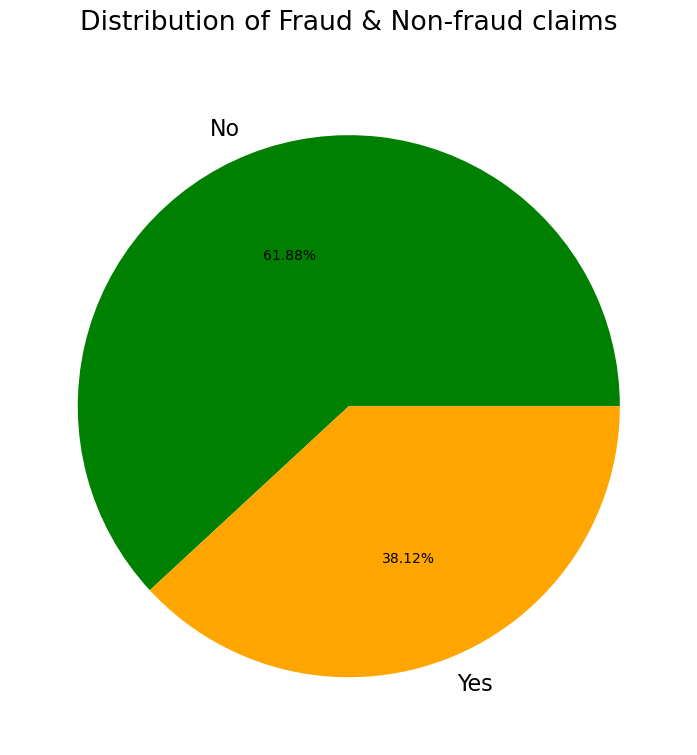

In [15]:
# Print the count of PotentialFraud values
print(pd.DataFrame(merged_iobp_dataframe['PotentialFraud'].value_counts()), "\n")

# Plotting the distribution of Fraud and Non-fraud claims using a pie chart
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots()
    
    # Creating a pie chart
    merged_iobp_dataframe['PotentialFraud'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['green', 'orange'], ax=ax)
    
    # Labeling and providing title to the pie chart
    ax.set_ylabel('')
    ax.set_title("Distribution of Fraud & Non-fraud claims\n")
    
    plt.show()

In [16]:
# Creating a new feature: Dead_Alive

In [17]:
# Converting 'DOB' column to datetime format
merged_iobp_dataframe['DOB'] = pd.to_datetime(merged_iobp_dataframe['DOB'], format="%Y-%m-%d")

In [18]:
merged_iobp_dataframe['DOB']

0        1943-01-01
1        1932-05-01
2        1913-12-01
3        1922-10-01
4        1930-07-01
            ...    
558206   1925-01-01
558207   1927-05-01
558208   1946-06-01
558209   1924-08-01
558210   1943-08-01
Name: DOB, Length: 558211, dtype: datetime64[ns]

In [19]:
# Converting 'DOD' column to datetime format
merged_iobp_dataframe['DOD'] = pd.to_datetime(merged_iobp_dataframe['DOD'], format="%Y-%m-%d")

In [20]:
merged_iobp_dataframe['DOD']

0        1970-01-01
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
558206   1970-01-01
558207   1970-01-01
558208   1970-01-01
558209   1970-01-01
558210   1970-01-01
Name: DOD, Length: 558211, dtype: datetime64[ns]

In [21]:
# Adding a new feature 'Dead_Alive' based on the 'DOD' column
merged_iobp_dataframe['Dead_Alive'] = merged_iobp_dataframe['DOD'].apply(lambda val: 'No' if pd.notna(val) and val != pd.to_datetime('1970-01-01') else 'Yes')

In [22]:
merged_iobp_dataframe['Dead_Alive']

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
558206    Yes
558207    Yes
558208    Yes
558209    Yes
558210    Yes
Name: Dead_Alive, Length: 558211, dtype: object

In [23]:
# Displaying the count of values in the 'Dead_Alive' column
merged_iobp_dataframe['Dead_Alive'].value_counts()

Yes    554080
No       4131
Name: Dead_Alive, dtype: int64

In [24]:
#Creating a New Feature : Claim_Duration

In [25]:
# Converting 'ClaimStartDt' column to datetime format
merged_iobp_dataframe['ClaimStartDt'] = pd.to_datetime(merged_iobp_dataframe['ClaimStartDt'], format="%Y-%m-%d")

In [26]:
merged_iobp_dataframe['ClaimStartDt']

0        2009-04-12
1        2009-09-06
2        2009-01-20
3        2009-10-17
4        2009-10-25
            ...    
558206   2009-06-02
558207   2009-02-08
558208   2009-07-09
558209   2009-04-16
558210   2009-09-20
Name: ClaimStartDt, Length: 558211, dtype: datetime64[ns]

In [27]:
# Converting 'ClaimEndDt' column to datetime format
merged_iobp_dataframe['ClaimEndDt'] = pd.to_datetime(merged_iobp_dataframe['ClaimEndDt'], format="%Y-%m-%d")

In [28]:
merged_iobp_dataframe['ClaimEndDt']

0        2009-04-18
1        2009-09-06
2        2009-02-01
3        2009-11-04
4        2009-10-29
            ...    
558206   2009-06-04
558207   2009-02-08
558208   2009-07-29
558209   2009-04-16
558210   2009-09-20
Name: ClaimEndDt, Length: 558211, dtype: datetime64[ns]

In [29]:
# Calculating 'Claim_Duration' based on the difference between 'ClaimEndDt' and 'ClaimStartDt'
merged_iobp_dataframe['Claim_Duration'] = (merged_iobp_dataframe['ClaimEndDt'] - merged_iobp_dataframe['ClaimStartDt']).dt.days

In [30]:
merged_iobp_dataframe['Claim_Duration']

0          6
1          0
2         12
3         18
4          4
          ..
558206     2
558207     0
558208    20
558209     0
558210     0
Name: Claim_Duration, Length: 558211, dtype: int64

In [31]:
merged_iobp_dataframe

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Dead_Alive,Claim_Duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,2009-04-12,...,2,1,1,0,0,60,70,Yes,Yes,6
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaN,...,2,2,2,0,2136,450,200,Yes,Yes,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,2,2,0,1068,100,20,Yes,Yes,12
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,...,1,2,2,0,1068,1050,540,Yes,Yes,18
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,2,0,2136,450,160,Yes,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,440,PHY317497,None,PHY317497,NaN,...,1,2,2,0,0,890,120,No,Yes,2
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,440,PHY376238,PHY376238,None,NaN,...,2,1,2,0,0,570,220,No,Yes,0
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,440,PHY338096,None,None,NaN,...,2,2,2,0,0,570,170,No,Yes,20
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,None,None,NaN,...,1,1,2,0,0,640,350,No,Yes,0


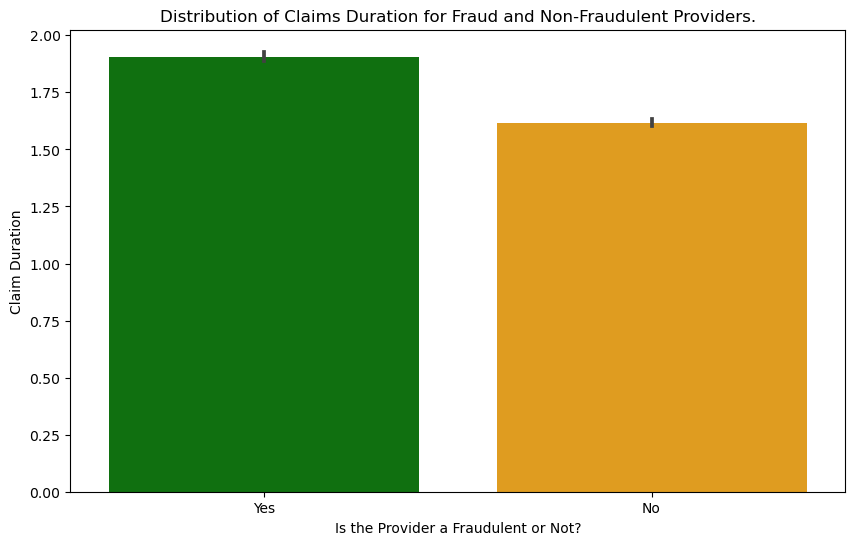

In [32]:
#Defining the size of the figure.
plt.figure(figsize=(10, 6))

# Creating a bar plot and defining the necessary parameters.
sns.barplot(data=merged_iobp_dataframe, x='PotentialFraud', y='Claim_Duration', palette=['green', 'orange'])

# Displaying the Title of Barplot.
plt.title('Distribution of Claims Duration for Fraud and Non-Fraudulent Providers.')

# Displaying the title of X-axis of the bar plot.
plt.xlabel('Is the Provider a Fraudulent or Not?')

# Displaying the title of Y-axis of the bar plot.
plt.ylabel('Claim Duration')

#Showing the plot.
plt.show()

In [33]:
#The graph above tells us that there's no noticeable difference in how long claims last for potentially fraudulent and non-fraudulent providers. So, we can conclude that the time a claim takes by itself may not be helpful in figuring out fraud cases.

In [34]:
# Relationship between Potentially Fraud & Claim Duration for Genders

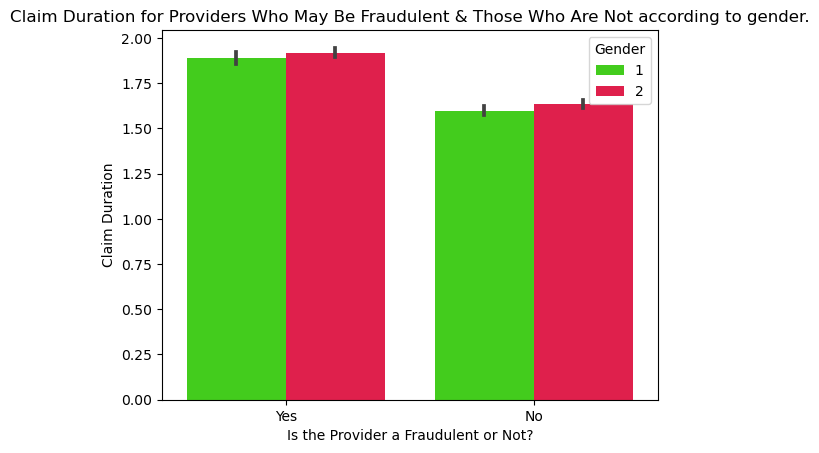

In [35]:
# Creating a bar plot and defining the necessary parameters.
sns.barplot(x='PotentialFraud', y='Claim_Duration', hue='Gender', data=merged_iobp_dataframe, palette='prism')

# Displaying the title of X-axis of the bar plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the bar plot.
plt.ylabel("Claim Duration")

# Displaying the title of the bar plot.
plt.title("Claim Duration for Providers Who May Be Fraudulent & Those Who Are Not according to gender.")

#Showing the plot.
plt.show();


In [36]:
#OBSERVATION

#The plot above makes it evident that there is no distinction in the distribution of Claim Duration between males and females for both Potentially Fraudulent and Non-Fraudulent Providers. Hence, it can be concluded that Claim Duration may not be effective in identifying fraud cases.

In [37]:
#Relationship between Potentially Fraud & Claim_Durationfor Dead_Alive?

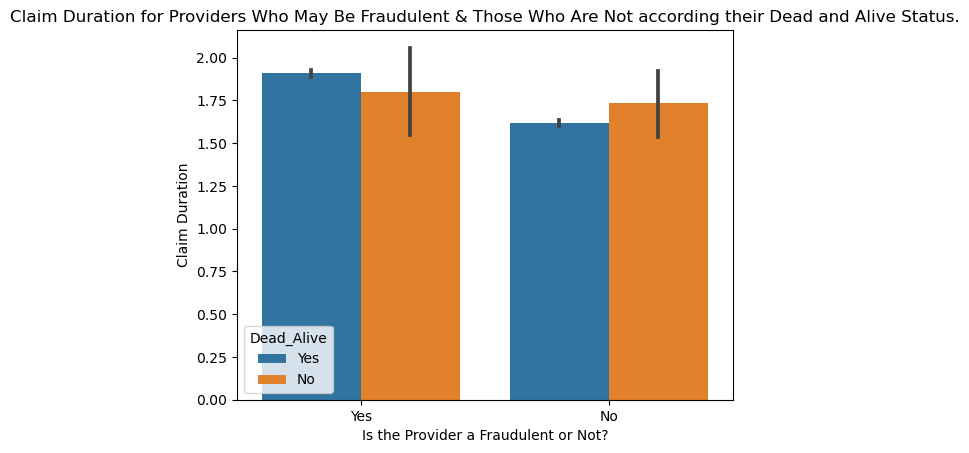

In [38]:
# Creating a bar plot and defining the necessary parameters.
sns.barplot(x='PotentialFraud', y='Claim_Duration', hue='Dead_Alive', data=merged_iobp_dataframe)

# Displaying the title of X-axis of the bar plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the bar plot.
plt.ylabel("Claim Duration")

# Displaying the title of the bar plot.
plt.title("Claim Duration for Providers Who May Be Fraudulent & Those Who Are Not according their Dead and Alive Status.")

#Showing the plot.
plt.show();

In [39]:
#Creating New Feature : Admitted_Duration

In [40]:
# Converting 'AdmissionDt' column to datetime format
merged_iobp_dataframe['AdmissionDt'] = pd.to_datetime(merged_iobp_dataframe['AdmissionDt'], format="%Y-%m-%d")

In [41]:
# Converting 'DischargeDt' column to datetime format
merged_iobp_dataframe['DischargeDt'] = pd.to_datetime(merged_iobp_dataframe['DischargeDt'], format="%Y-%m-%d")

In [42]:
# Calculating 'Admitted_Duration' based on the difference between 'DischargeDt' and 'AdmissionDt'
merged_iobp_dataframe['Admitted_Duration'] = (merged_iobp_dataframe['DischargeDt'] - merged_iobp_dataframe['AdmissionDt']).dt.days

In [43]:
# Dropping 'AdmissionDt' and 'DischargeDt' columns after calculating 'Admitted_Duration'
merged_iobp_dataframe.drop(['AdmissionDt', 'DischargeDt'], axis=1, inplace=True)

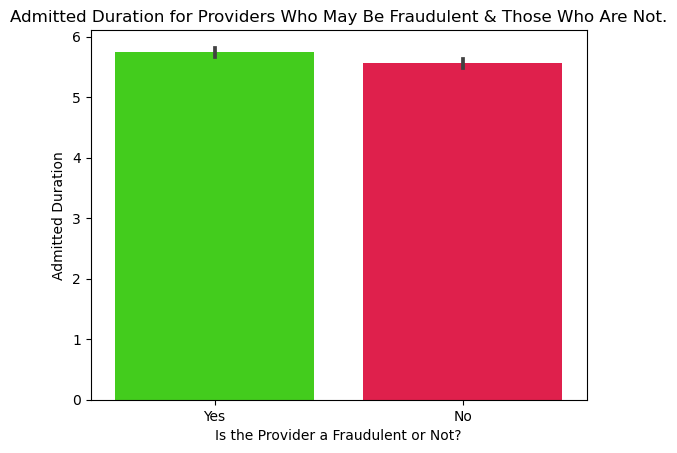

In [44]:
# Creating a bar plot and defining the necessary parameters.
sns.barplot(x='PotentialFraud', y='Admitted_Duration',data=merged_iobp_dataframe, palette='prism')

# Displaying the title of X-axis of the bar plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the bar plot.
plt.ylabel("Admitted Duration")

# Displaying the title of the bar plot.
plt.title("Admitted Duration for Providers Who May Be Fraudulent & Those Who Are Not.")

#Showing the plot.
plt.show();

In [45]:
#Relationship betwwen Admit_Duration and Potentially Fraud for both the Genders

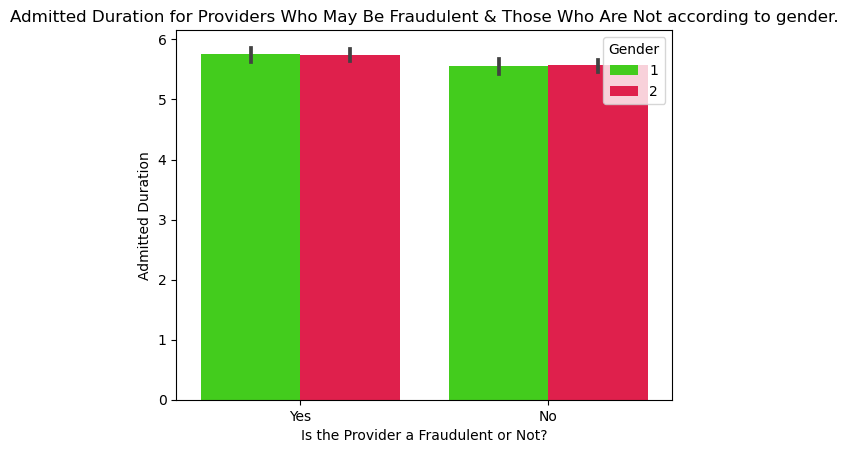

In [46]:
# Creating a bar plot and defining the necessary parameters.
sns.barplot(x='PotentialFraud', y='Admitted_Duration', hue='Gender', data=merged_iobp_dataframe, palette='prism')

# Displaying the title of X-axis of the bar plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the bar plot.
plt.ylabel("Admitted Duration")

# Displaying the title of the bar plot.
plt.title("Admitted Duration for Providers Who May Be Fraudulent & Those Who Are Not according to gender.")

#Showing the plot.
plt.show();


In [47]:
#Relationship between Potentially Fraud & Admitted_Duration for Dead_Alive

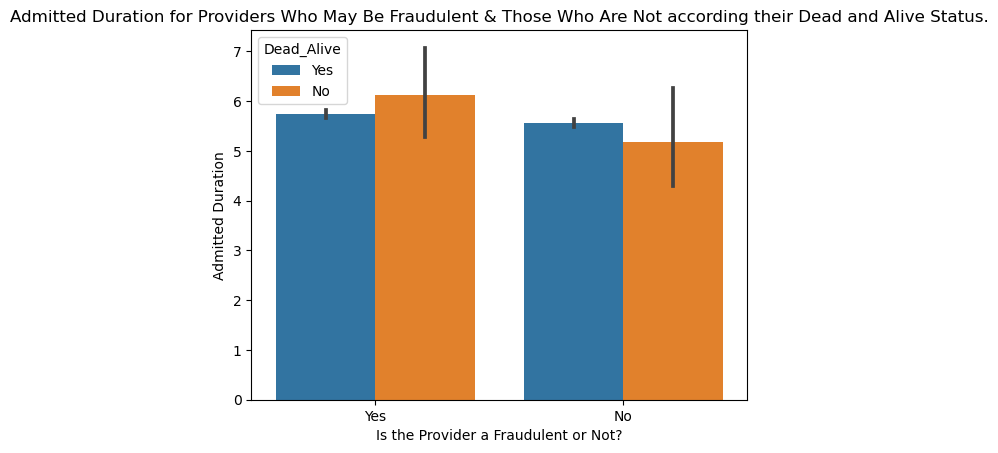

In [48]:
# Creating a bar plot and defining the necessary parameters.
sns.barplot(x='PotentialFraud', y='Admitted_Duration', hue='Dead_Alive', data=merged_iobp_dataframe)

# Displaying the title of X-axis of the bar plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the bar plot.
plt.ylabel("Admitted Duration")

# Displaying the title of the bar plot.
plt.title("Admitted Duration for Providers Who May Be Fraudulent & Those Who Are Not according their Dead and Alive Status.")

#Showing the plot.
plt.show();

In [49]:
#Creating New Feature :: Benefi_Age

In [50]:
# Replace 0 with NaN
merged_iobp_dataframe['DOD'].replace(0, np.nan, inplace=True)

In [51]:
# Replace NaN values with max value in 'DOD' column
merged_iobp_dataframe['DOD'].fillna(value=merged_iobp_dataframe['DOD'].max(), inplace=True)

In [52]:
# Calculating the age of beneficiaries based on the difference between 'DOD' and 'DOB'
merged_iobp_dataframe['Benefi_Age'] = round(((merged_iobp_dataframe['DOD'] - merged_iobp_dataframe['DOB']).dt.days) / 365, 1)

In [53]:
merged_iobp_dataframe.drop(['DOB', 'DOD'], axis=1, inplace=True)

In [54]:
merged_iobp_dataframe

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Dead_Alive,Claim_Duration,Admitted_Duration,Benefi_Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,7866,...,1,0,0,60,70,Yes,Yes,6,6.0,27.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,0,...,2,0,2136,450,200,Yes,Yes,0,NaN,37.7
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,2,0,1068,100,20,Yes,Yes,12,12.0,56.1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,V5789,...,2,0,1068,1050,540,Yes,Yes,18,18.0,47.3
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,2,0,2136,450,160,Yes,Yes,4,4.0,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,440,PHY317497,None,PHY317497,0,...,2,0,0,890,120,No,Yes,2,NaN,45.0
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,440,PHY376238,PHY376238,None,99639,...,2,0,0,570,220,No,Yes,0,NaN,42.7
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,440,PHY338096,None,None,0,...,2,0,0,570,170,No,Yes,20,NaN,23.6
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,None,None,0,...,2,0,0,640,350,No,Yes,0,NaN,45.4


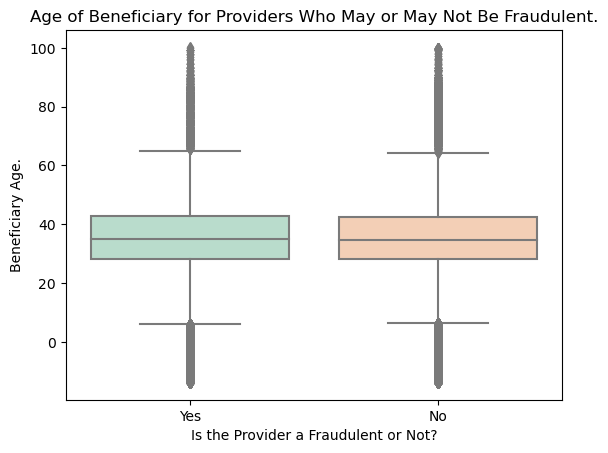

In [55]:
#Creating a bar plot and defining the necessary parameters.
sns.boxplot(data=merged_iobp_dataframe, x='PotentialFraud', y='Benefi_Age', palette='Pastel2')

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Beneficiary Age.")

# Displaying the title of box plot.
plt.title("Age of Beneficiary for Providers Who May or May Not Be Fraudulent.")

#Shwoing the plot.
plt.show()

In [56]:
#Relationship between Potentially Fraud & Benefi_Age for both Genders

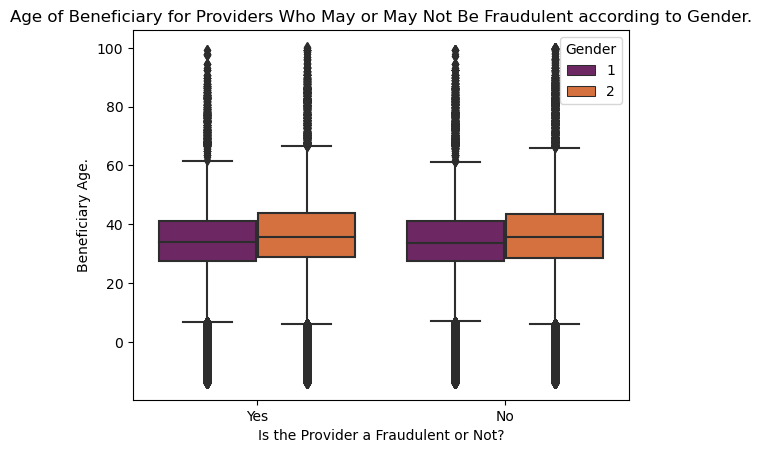

In [57]:
#Creating a bar plot and defining the necessary parameters.
sns.boxplot(data=merged_iobp_dataframe, x='PotentialFraud',y='Benefi_Age', hue='Gender', palette='inferno')   

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Beneficiary Age.")

# Displaying the title of box plot.
plt.title("Age of Beneficiary for Providers Who May or May Not Be Fraudulent according to Gender.")

#Shwoing the plot.
plt.show()

In [58]:
#Relationship b/w Bene_Age and Potentially Fraud for Is_Alive?

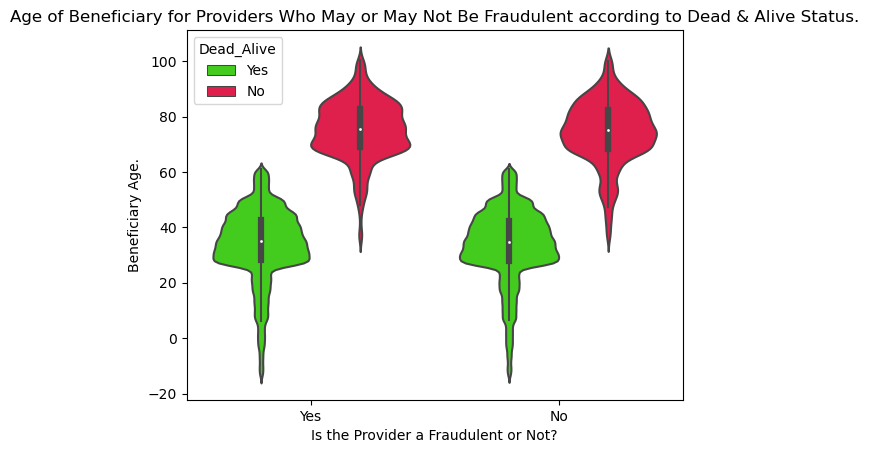

In [59]:
#Creation of the plot.
sns.violinplot(data=merged_iobp_dataframe, x='PotentialFraud',y='Benefi_Age', hue='Dead_Alive', palette='prism')      

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Beneficiary Age.")

# Displaying the title of box plot.
plt.title("Age of Beneficiary for Providers Who May or May Not Be Fraudulent according to Dead & Alive Status.")

#Shwoing the plot.
plt.show()

In [60]:
#Does InscClaimAmtReimbursed influences Potentially Fraud?
#Relationship b/w InscClaimAmtReimbursed and Potentially Fraud

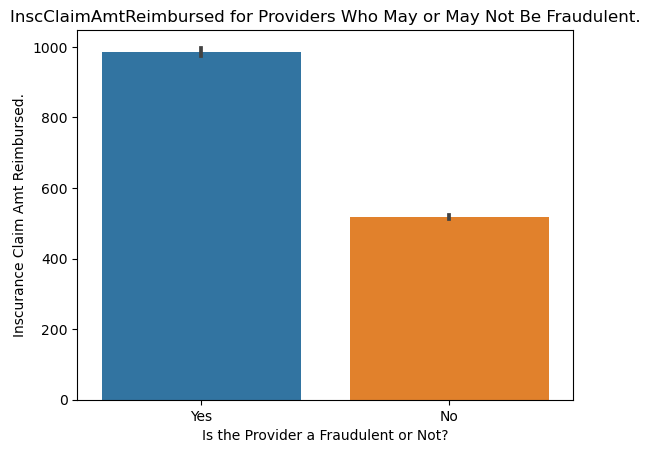

In [61]:
sns.barplot(data=merged_iobp_dataframe, x='PotentialFraud',y='InscClaimAmtReimbursed')   

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Inscurance Claim Amt Reimbursed.")

# Displaying the title of box plot.
plt.title("InscClaimAmtReimbursed for Providers Who May or May Not Be Fraudulent.")

#Shwoing the plot.
plt.show()

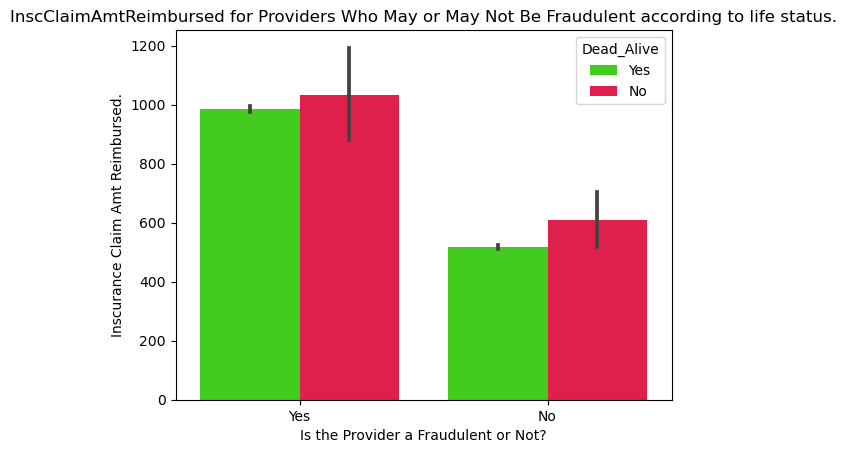

In [62]:
#Creation of the plot.
sns.barplot(data=merged_iobp_dataframe, x='PotentialFraud',y='InscClaimAmtReimbursed', hue='Dead_Alive', palette='prism')      

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Inscurance Claim Amt Reimbursed.")

# Displaying the title of box plot.
plt.title("InscClaimAmtReimbursed for Providers Who May or May Not Be Fraudulent according to life status.")

#Shwoing the plot.
plt.show()

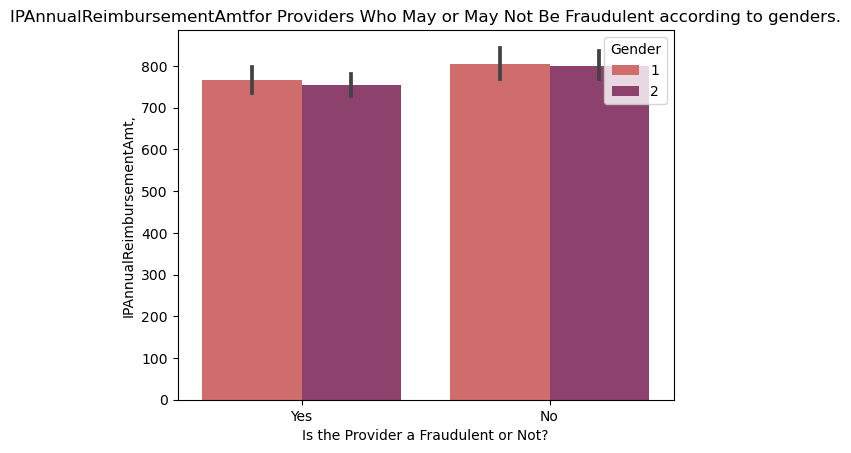

In [63]:
#Creation of plot for visualisation.
sns.barplot(data=merged_iobp_dataframe[merged_iobp_dataframe['Admitted'] == 1], x='PotentialFraud',y='IPAnnualReimbursementAmt',
            hue='Gender',palette='flare')   

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("IPAnnualReimbursementAmt,")

# Displaying the title of box plot.
plt.title("IPAnnualReimbursementAmtfor Providers Who May or May Not Be Fraudulent according to genders.")

#Shwoing the plot.
plt.show()

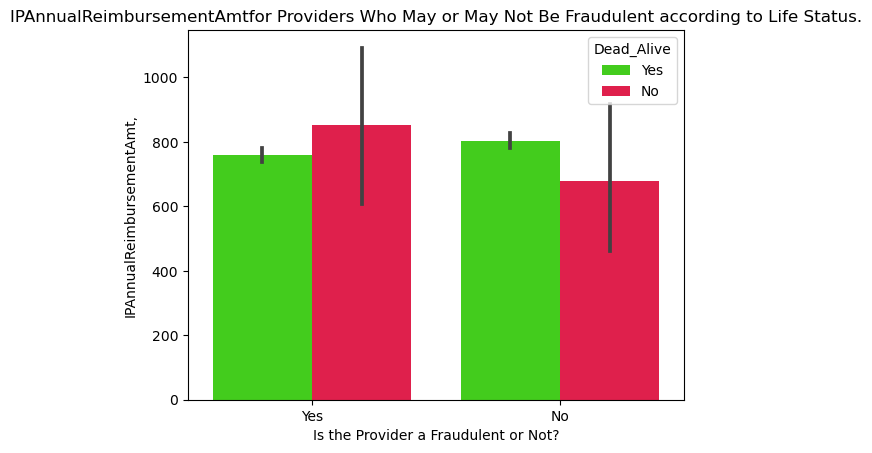

In [64]:
#Creation of plot for visualisation.
sns.barplot(data=merged_iobp_dataframe[merged_iobp_dataframe['Admitted'] == 1], x='PotentialFraud',y='IPAnnualReimbursementAmt',
            hue='Dead_Alive',palette='prism')      

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("IPAnnualReimbursementAmt,")

# Displaying the title of box plot.
plt.title("IPAnnualReimbursementAmtfor Providers Who May or May Not Be Fraudulent according to Life Status.")

#Shwoing the plot.
plt.show()

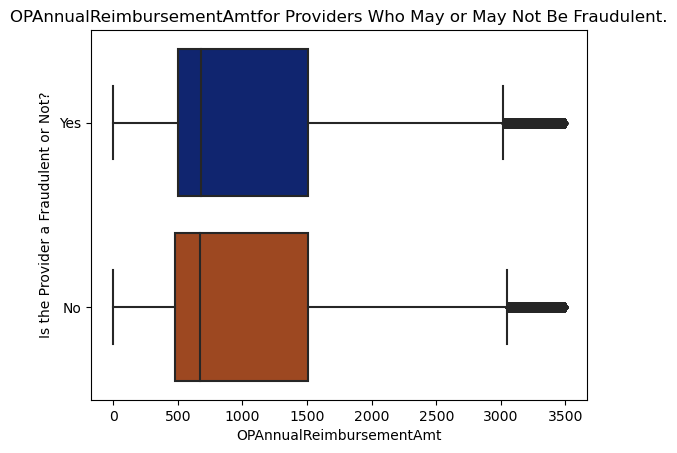

In [65]:
#Creation of plot for visualisation.
sns.boxplot(data=merged_iobp_dataframe[merged_iobp_dataframe['Admitted'] == 0], y='PotentialFraud', x='OPAnnualReimbursementAmt', 
                         palette='dark')   

# Displaying the title of X-axis of the box plot.
plt.xlabel("OPAnnualReimbursementAmt")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of box plot.
plt.title("OPAnnualReimbursementAmtfor Providers Who May or May Not Be Fraudulent.")

#Shwoing the plot.
plt.show()

In [66]:
print(pd.DataFrame(merged_iobp_dataframe[(merged_iobp_dataframe['OPAnnualReimbursementAmt'] == 0)]['Admitted'].value_counts()))

   Admitted
1      3909
0      1009


In [67]:
print(pd.DataFrame(merged_iobp_dataframe[(merged_iobp_dataframe['OPAnnualReimbursementAmt'] == 0) & (merged_iobp_dataframe['Admitted'] == 0)]\
                   ['PotentialFraud'].value_counts()))

     PotentialFraud
No              617
Yes             392


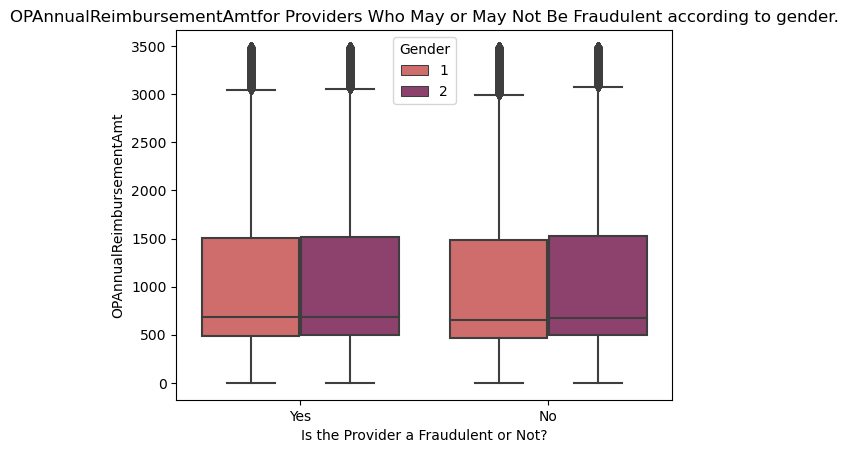

In [68]:
#Creation of plot for visualisation.
sns.boxplot(data=merged_iobp_dataframe[merged_iobp_dataframe['Admitted'] == 0], x='PotentialFraud',y='OPAnnualReimbursementAmt',
            hue='Gender',palette='flare')   

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("OPAnnualReimbursementAmt")

# Displaying the title of box plot.
plt.title("OPAnnualReimbursementAmtfor Providers Who May or May Not Be Fraudulent according to gender.")

#Shwoing the plot.
plt.show()

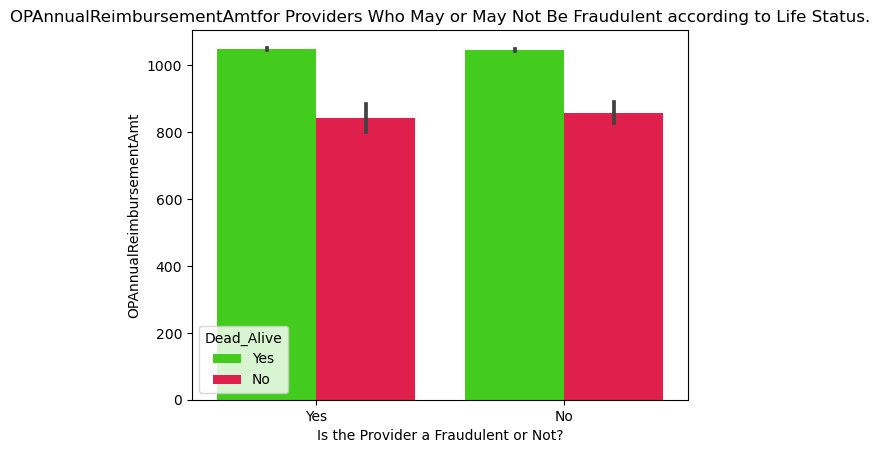

In [69]:
#Creation of plot for visualisation.
sns.barplot(data=merged_iobp_dataframe[merged_iobp_dataframe['Admitted'] == 0], x='PotentialFraud',y='OPAnnualReimbursementAmt',
            hue='Dead_Alive',palette='prism')      

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of Y-axis of the box plot.
plt.ylabel("OPAnnualReimbursementAmt")

# Displaying the title of box plot.
plt.title("OPAnnualReimbursementAmtfor Providers Who May or May Not Be Fraudulent according to Life Status.")

#Shwoing the plot.
plt.show()

In [70]:
#Creating New Feature : Overall Number of cases seen by Attending Physician or claims

In [71]:
# Overall unique count of Attending Physicians
unique_physicians = merged_iobp_dataframe['AttendingPhysician'].nunique()

In [72]:
unique_physicians_excluding_none = unique_physicians - int('None' in merged_iobp_dataframe['AttendingPhysician'].unique())

In [73]:
# Print the total unique count of Attending Physicians in the dataset
print("Total unique count of Attending Physicians in the dataset is {}".format(unique_physicians_excluding_none))

Total unique count of Attending Physicians in the dataset is 82063


In [74]:
# Counting the total claims filed by each Attending Physician and creating a new column 'Att_Phy_tot_claims'
merged_iobp_dataframe['Att_Phy_tot_claims'] = merged_iobp_dataframe.groupby(['AttendingPhysician'])['ClaimID'].transform('count')

In [75]:
# Displaying the count of unique values in the 'Att_Phy_tot_claims' column
print(merged_iobp_dataframe['Att_Phy_tot_claims'].value_counts())

1      36099
2      30344
3      23112
4      18312
5      14975
       ...  
174      174
172      172
171      171
169      169
165      165
Name: Att_Phy_tot_claims, Length: 363, dtype: int64


In [76]:
merged_iobp_dataframe['Att_Phy_tot_claims'].describe()

count    558211.000000
mean        142.334151
std         301.762443
min           1.000000
25%           7.000000
50%          33.000000
75%         118.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

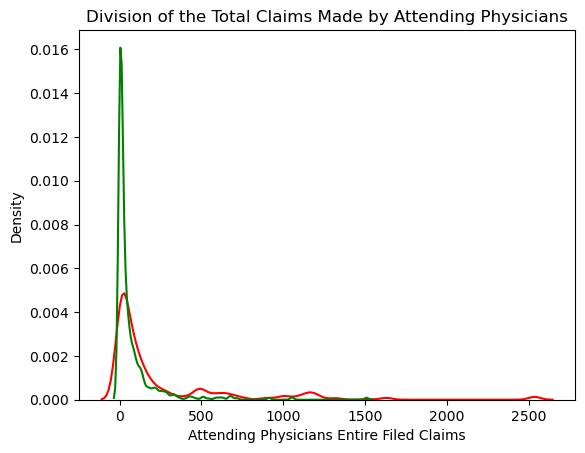

In [77]:
#Creation of plot for visualisation.
sns.kdeplot(x=merged_iobp_dataframe[merged_iobp_dataframe['PotentialFraud'] == 'Yes']['Att_Phy_tot_claims'],color='red')
sns.kdeplot(x=merged_iobp_dataframe[merged_iobp_dataframe['PotentialFraud'] == 'No']['Att_Phy_tot_claims'],color='green')

# Displaying the title of X-axis of the box plot.
plt.xlabel("Attending Physicians Entire Filed Claims")

# Displaying the title of the box plot.
plt.title("Division of the Total Claims Made by Attending Physicians")

#Shwoing the plot.
plt.show()

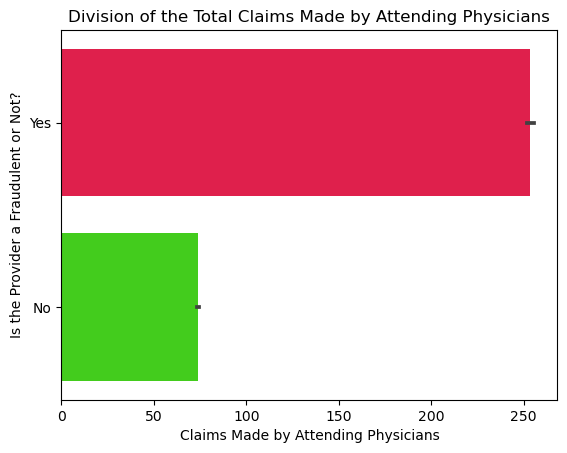

In [78]:
#Creation of plot for visualisation.
sns.barplot(data=merged_iobp_dataframe, y='PotentialFraud', x='Att_Phy_tot_claims', palette='prism_r')   

# Displaying the title of Y-axis of the box plot.
plt.ylabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of the box plot.
plt.title("Division of the Total Claims Made by Attending Physicians")

# Displaying the title of X-axis of the box plot.
plt.xlabel("Claims Made by Attending Physicians")

#Shwoing the plot.
plt.show()

In [79]:
#Creating New Feature : Overall Unique number of Codes used by a PROVIDER as claim admit 

In [80]:
# Counting the total unique Claim Admit Diagnosis Codes used by each Provider and creating a new column 'PRV_Tot_Admit_DCodes'
merged_iobp_dataframe['PRV_Tot_Admit_DCodes'] = merged_iobp_dataframe.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [81]:
merged_iobp_dataframe['PRV_Tot_Admit_DCodes']

0         60
1         60
2         60
3         60
4         60
          ..
558206     1
558207     1
558208     1
558209     1
558210     1
Name: PRV_Tot_Admit_DCodes, Length: 558211, dtype: int64

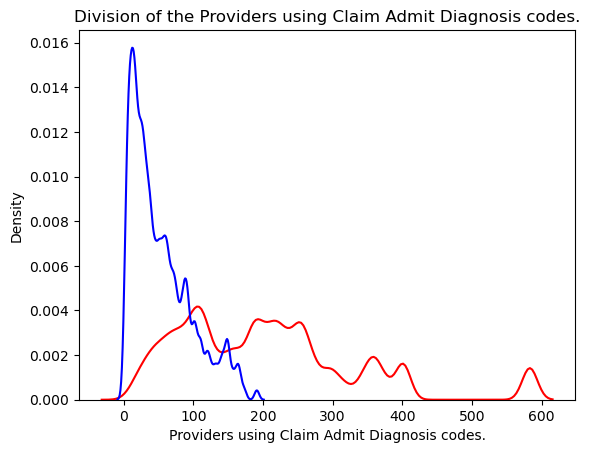

In [82]:
#Creation of plot for visualisation.
sns.kdeplot(x=merged_iobp_dataframe[merged_iobp_dataframe['PotentialFraud'] == 'Yes']['PRV_Tot_Admit_DCodes'], color='red')
sns.kdeplot(x=merged_iobp_dataframe[merged_iobp_dataframe['PotentialFraud'] == 'No']['PRV_Tot_Admit_DCodes'], color='blue')

# Displaying the title of X-axis of the box plot.
plt.xlabel("Providers using Claim Admit Diagnosis codes.")

# Displaying the title of the box plot.
plt.title("Division of the Providers using Claim Admit Diagnosis codes.")

#Shwoing the plot.
plt.show()

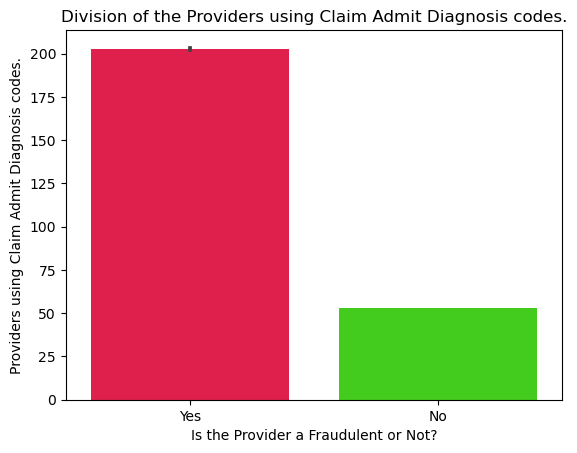

In [83]:
#Creation of plot for visualisation.
sns.barplot(data=merged_iobp_dataframe, x='PotentialFraud', y='PRV_Tot_Admit_DCodes', palette='prism_r')   

# Displaying the title of X-axis of the box plot.
plt.xlabel("Is the Provider a Fraudulent or Not?")

# Displaying the title of the box plot.
plt.title("Division of the Providers using Claim Admit Diagnosis codes.")

# Displaying the title of y-axis of the box plot.
plt.ylabel("Providers using Claim Admit Diagnosis codes.")

#Shwoing the plot.
plt.show()

In [84]:
# Replacing 'Y' with 1 in the 'RenalDiseaseIndicator' column to convert it into a numerical binary indicator
merged_iobp_dataframe['RenalDiseaseIndicator'] = merged_iobp_dataframe['RenalDiseaseIndicator'].replace({"Y": 1})

In [85]:
merged_iobp_dataframe['RenalDiseaseIndicator']

0         0
1         0
2         0
3         0
4         0
         ..
558206    0
558207    0
558208    1
558209    0
558210    0
Name: RenalDiseaseIndicator, Length: 558211, dtype: object

In [86]:
Chronic_Columns = ['ChronicCond_Alzheimer','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary','ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
merged_iobp_dataframe[Chronic_Columns] = merged_iobp_dataframe[Chronic_Columns].replace({2: 0})

In [87]:
merged_iobp_dataframe[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,1,0,1,0,0,1,1,1,0,1,1
1,1,1,1,0,0,0,0,1,0,0,0
2,1,1,1,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
558206,0,0,0,0,0,0,0,1,1,0,0
558207,1,0,1,0,0,0,1,1,0,1,0
558208,1,1,1,0,1,0,1,1,0,0,0
558209,0,1,1,1,1,1,1,1,1,1,0


In [88]:
#Defining a function to create attribute of the fraud columns.
#The parameters of the function are data frame and column names.
def Attributes_Based_On_Physicians_For_Frauds(df,Columns):
    
    #For each columns we need to define the attributes so using for loop.
    for Col_Name in Columns:
        
        #Grouping the specific data and finding the counts.
        Group_Values = df.groupby(Col_Name).size().reset_index(name='counts')
        
        #Calculating the values of Each upper,lower and middle Quartiles and classifiying the data based on counts.
        LQ,MQ,UQ = Group_Values['counts'].quantile([0.25, 0.5, 0.75])
        
        #Defining Scenarios for fraud attributes based on quartiles.
        Scenarios = [
            (df[Col_Name].isin(Group_Values.loc[Group_Values['counts'] <= LQ, Col_Name])),
            (df[Col_Name].isin(Group_Values.loc[(Group_Values['counts'] > LQ) & (Group_Values['counts'] <= MQ), Col_Name])),
            (df[Col_Name].isin(Group_Values.loc[(Group_Values['counts'] > MQ) & (Group_Values['counts'] <= UQ), Col_Name])),
            (df[Col_Name].isin(Group_Values.loc[Group_Values['counts'] > UQ, Col_Name]))
        ]

        # Defining corresponding attributes for each scenarios.
        Attributes = ['Normal Activity.', 'Suspicious Activity.', 'Very Suspicious Activity.', 'Mostly Fraud.']

        #Stroring the results in a New Column.
        New_Col = f'{Col_Name}_Fraud_Attributes'
        df[New_Col] = np.select(Scenarios,Attributes,default='unknown')
    
    #Returning the data frame with updated columns.
    return df

In [89]:
# Calling the function for three column attributes OperatingPhysician,OtherPhysician,AttendingPhysician
Attributes_Based_On_Physicians_For_Frauds(merged_iobp_dataframe, ['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician'])

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,PotentialFraud,Dead_Alive,Claim_Duration,Admitted_Duration,Benefi_Age,Att_Phy_tot_claims,PRV_Tot_Admit_DCodes,OperatingPhysician_Fraud_Attributes,OtherPhysician_Fraud_Attributes,AttendingPhysician_Fraud_Attributes
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,7000,PHY390922,None,None,7866,...,Yes,Yes,6,6.0,27.0,1,60,Mostly Fraud.,Mostly Fraud.,Normal Activity.
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,0,...,Yes,Yes,0,NaN,37.7,1,60,Normal Activity.,Mostly Fraud.,Normal Activity.
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,Yes,Yes,12,12.0,56.1,1,60,Mostly Fraud.,Very Suspicious Activity.,Normal Activity.
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,V5789,...,Yes,Yes,18,18.0,47.3,2,60,Normal Activity.,Mostly Fraud.,Suspicious Activity.
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,Yes,Yes,4,4.0,39.5,3,60,Mostly Fraud.,Very Suspicious Activity.,Very Suspicious Activity.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,440,PHY317497,None,PHY317497,0,...,No,Yes,2,NaN,45.0,1,1,Mostly Fraud.,Normal Activity.,Normal Activity.
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,440,PHY376238,PHY376238,None,99639,...,No,Yes,0,NaN,42.7,10,1,Mostly Fraud.,Mostly Fraud.,Mostly Fraud.
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,440,PHY338096,None,None,0,...,No,Yes,20,NaN,23.6,1,1,Mostly Fraud.,Mostly Fraud.,Normal Activity.
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,None,None,0,...,No,Yes,0,NaN,45.4,1,1,Mostly Fraud.,Mostly Fraud.,Normal Activity.


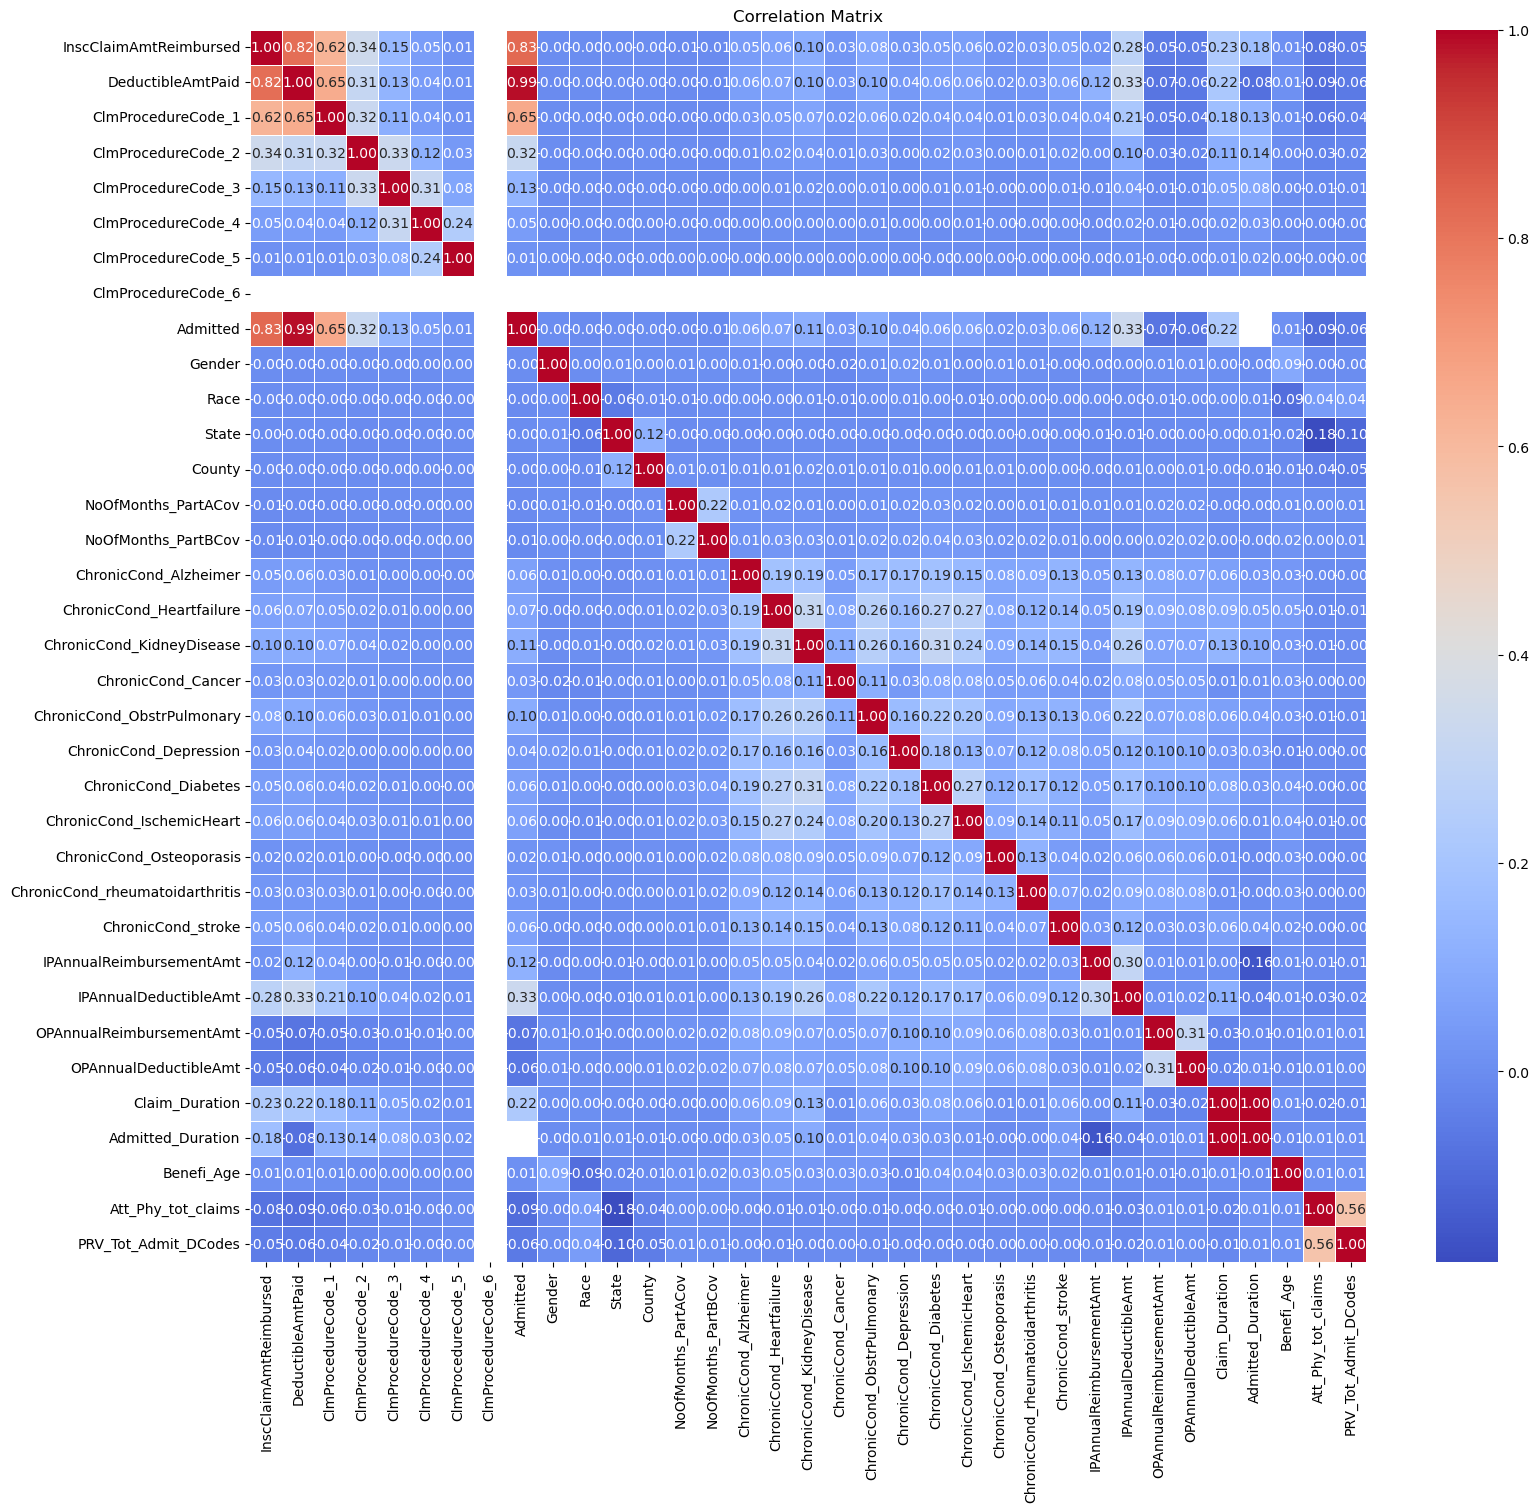

In [90]:
# Calculate correlation matrix
correlation_matrix = merged_iobp_dataframe.corr(numeric_only=True)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [91]:
# Identify highly correlated features
correlation_matrix = merged_iobp_dataframe.corr(numeric_only=True)

# Find pairs of highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated columns
merged_iobp_dataframe_filtered = merged_iobp_dataframe.drop(columns=highly_correlated)

# Display the resulting DataFrame
print("DataFrame after removing highly correlated columns:", merged_iobp_dataframe_filtered.head())


DataFrame after removing highly correlated columns:       BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06 2009-09-06  PRV55912   
2  BENE17521   CLM34721   2009-01-20 2009-02-01  PRV55912   
3  BENE21718   CLM72336   2009-10-17 2009-11-04  PRV55912   
4  BENE22934   CLM73394   2009-10-25 2009-10-29  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    7000          PHY390922               None   
1                      50          PHY365867          PHY327147   
2                   19000          PHY349293          PHY370861   
3                   17000          PHY334706          PHY334706   
4                   13000          PHY390614          PHY323689   

  OtherPhysician ClmAdmitDiagnosisCode  ... OPAnnualDeductibleAmt  \
0           None                  7866  ...                    70   
1           None                     0  

In [92]:
# highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
# print(highly_correlated)

In [93]:
merged_iobp_dataframe_filtered.to_pickle("df_FinalDataset.csv")